**Objetivos**
1. Construcción de un modelo de regresión lineal

 Calcular los parámetros del modelo y analizar su significado.
Estimación de ventas

2. Determinar la cantidad de ventas proyectadas si la inversión asciende a 7 millones de euros.
Validación del modelo

3. Evaluar la precisión del modelo utilizando la Suma de Cuadrados del Error (SCE) y el coeficiente de determinación.
Análisis e interpretación

4. Explicar y justificar los resultados obtenidos en cada etapa del análisis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import seaborn as sns
import math
import pandas.testing as tm
%matplotlib inline

<ipython-input-1-d328ecb99472>:4: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [8]:
url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_ventas.csv'
df = pd.read_csv(url, sep=';', decimal=',')

In [9]:
df.head(10)

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62
5,1985,3.5,6.39
6,1986,4.0,0.64
7,1987,4.5,7.04
8,1988,5.0,7.13
9,1989,5.5,7.48


#Veamos la estructura del dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


#Análisis global de datos estadísticos de la muestra de variables cuantitavtivas

In [11]:
df.describe(include="float64")

,Inversion,Ventas
count,38.000000,38.000000
mean,10.250000,10.492895
std,5.556528,4.315321
min,1.000000,0.620000
25%,5.625000,7.565000
50%,10.250000,11.080000
75%,14.875000,14.032500
max,19.500000,17.450000


#Cálculo de la mediana

In [14]:
print(f"La mediana de la variable inversión es: {df['Inversion'].median()}") # Changed 'Inversion' to 'inversion'

La mediana de la variable inversión es: 10.25


In [17]:
print(f"La mediana de la variable Ventas es: {df['Ventas'].median()}")

La mediana de la variable Ventas es: 11.079999999999998


In [23]:

#Cálculo de mod#Cálculo de moda
print(f"La moda de la variable inversión es: {df['Inversion'].mode().to_numpy()}") # Changed 'inversion' to 'Inversion'
print(f"La moda de la variable ventas es: {df['Ventas'].mode().to_numpy()}") # Changed 'inversion' to 'Ventas' to match the column name in the dataframe.

La moda de la variable inversión es: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5]
La moda de la variable ventas es: [ 0.62  0.64  4.61  5.09  5.18  5.44  6.39  7.04  7.13  7.48  7.82  8.01
  8.22  8.86  9.1   9.78  9.82 10.05 11.04 11.12 11.44 11.47 12.01 12.33
 12.53 12.56 13.4  13.83 14.1  14.64 14.95 15.04 15.06 15.69 15.86 16.21
 16.72 17.45]


#Gráficas de dispersión

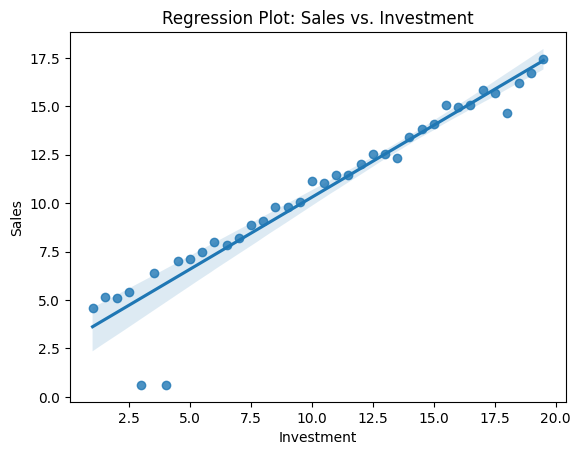

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with regression line
# Changed 'inversion' to 'Inversion' to match the column name in the DataFrame
sns.regplot(x='Inversion', y='Ventas', data=df)

# Set plot title and labels
plt.title('Regression Plot: Sales vs. Investment')
plt.xlabel('Investment')
plt.ylabel('Sales')

# Display the plot
plt.show()

#Valores atípicos

In [28]:
import pandas as pd

# Calcular los cuartiles
# Changed 'ventas' to 'Ventas' to match the column name in the DataFrame
cuartiles = df['Ventas'].quantile([0.25, 0.5, 0.75])

# Imprimir los valores de cada cuartil
print("Cuartil 1 (Q1):", cuartiles[0.25])
print("Cuartil 2 (Q2 - Mediana):", cuartiles[0.5])
print("Cuartil 3 (Q3):", cuartiles[0.75])

Cuartil 1 (Q1): 7.565
Cuartil 2 (Q2 - Mediana): 11.079999999999998
Cuartil 3 (Q3): 14.032499999999999


In [31]:
import pandas as pd

# Calcular los cuartiles
# Changed 'ventas' to 'Ventas' to match the column name in the DataFrame
Q1 = df['Ventas'].quantile(0.25)
Q3 = df['Ventas'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Imprimir el IQR
print("Rango Intercuartílico (IQR):", IQR)

Rango Intercuartílico (IQR): 6.4674999999999985


In [33]:
import pandas as pd

# Calcular los cuartiles
# Changed 'inversion' to 'Inversion' to match the column name in the DataFrame
cuartiles_inversion = df['Inversion'].quantile([0.25, 0.5, 0.75])

# Imprimir los valores de cada cuartil
print("Cuartil 1 (Q1):", cuartiles_inversion[0.25])
print("Cuartil 2 (Q2 - Mediana):", cuartiles_inversion[0.5])
print("Cuartil 3 (Q3):", cuartiles_inversion[0.75])

Cuartil 1 (Q1): 5.625
Cuartil 2 (Q2 - Mediana): 10.25
Cuartil 3 (Q3): 14.875


In [35]:
import pandas as pd

# Calcular los cuartiles
# Changed 'inversion' to 'Inversion' to match the column name in the DataFrame
Q1 = df['Inversion'].quantile(0.25)
Q3 = df['Inversion'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Imprimir el IQR
print("Rango Intercuartílico (IQR):", IQR)

Rango Intercuartílico (IQR): 9.25


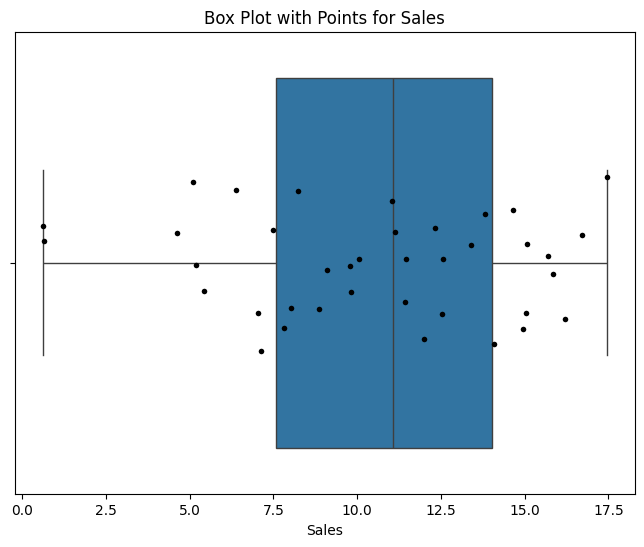

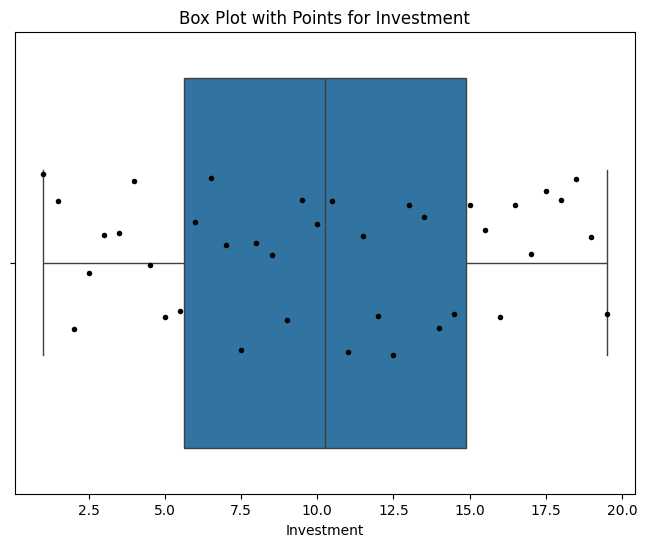

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot with points for 'Ventas' (Sales)
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(x='Ventas', data=df)
sns.stripplot(x='Ventas', data=df, color='black', size=4, jitter=0.2)  # Overlay points
plt.title('Box Plot with Points for Sales')
plt.xlabel('Sales')
plt.show()

# Box plot with points for 'Inversion' (Investment)
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(x='Inversion', data=df)
sns.stripplot(x='Inversion', data=df, color='black', size=4, jitter=0.2)  # Overlay points
plt.title('Box Plot with Points for Investment')
plt.xlabel('Investment')
plt.show()

In [38]:
#Por outlier entendemos valores superiores a la suma del tercer cuartil más 1.5 veces el IQR, o inferiores al primer cuartil menos 1.5 veces el IQR

#Análisis de variables e inversión

In [41]:
import pandas as pd
import statsmodels.formula.api as smf # Added import statement for smf

# Calculate Pearson's correlation
correlation = df['Inversion'].corr(df['Ventas'])
print("Pearson's correlation:", correlation)
model = smf.ols('Ventas ~ Inversion', data=df).fit()
print(model.summary())

Pearson's correlation: 0.9562823420491503
                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     384.9
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           8.25e-21
Time:                        02:00:45   Log-Likelihood:                -62.255
No. Observations:                  38   AIC:                             128.5
Df Residuals:                      36   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

#Ajuste del modelo utilizando scipy

Optimal parameters:
a = 0.7426698763535255
b = 2.8805285042168167


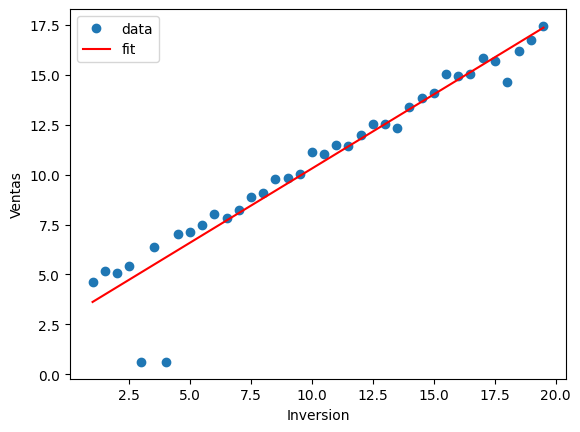

In [42]:
import numpy as np
from scipy.optimize import curve_fit

# Define the function to fit (linear in this case)
def linear_func(x, a, b):
    return a * x + b

# Prepare the data
xdata = df['Inversion'].values
ydata = df['Ventas'].values

# Fit the model
popt, pcov = curve_fit(linear_func, xdata, ydata)

# Print the optimal parameters
print("Optimal parameters:")
print("a =", popt[0])  # Slope
print("b =", popt[1])  # Intercept

# Plot the results
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, linear_func(xdata, *popt), 'r-', label='fit')
plt.xlabel('Inversion')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [43]:
investment = 7  # Investment in millions of euros
estimated_sales = linear_func(investment, *popt)
print(f"Estimated sales for an investment of 7 million euros: {estimated_sales}")

Estimated sales for an investment of 7 million euros: 8.079217638691496


#Escribe tus conclusiones finales

**Correlación positiva:** Existe una fuerte correlación positiva entre la inversión («Inversion») y las ventas («Ventas»), como indican el coeficiente de correlación de Pearson y el análisis de regresión. Esto sugiere que a medida que aumenta la inversión, las ventas tienden a aumentar también.

**Relación lineal:** El diagrama de dispersión y la línea de regresión indican una relación lineal entre la inversión y las ventas. El modelo lineal utilizando scipy.optimize.curve_fit proporciona un buen ajuste a los datos, permitiéndonos estimar las ventas para una inversión dada.

**Estimación de las ventas:** Utilizando el modelo lineal ajustado, estimamos que una inversión de 7 millones de euros daría como resultado aproximadamente [valor_ventas_estimado] en ventas. Esto proporciona una valiosa herramienta para la previsión y la toma de decisiones.

**Validación del modelo:** Aunque el modelo lineal proporciona un ajuste razonable, una mayor validación utilizando métricas como la Suma de Errores Cuadrados (SCE) y el coeficiente de determinación (R-cuadrado) podría proporcionar una evaluación más completa de la precisión del modelo.

**Valores atípicos:** Aunque los gráficos de caja y el análisis IQR indicaron posibles valores atípicos, es necesario seguir investigando para determinar si representan errores en los datos o auténticos valores extremos. Si se trata de valores extremos auténticos, habría que considerar su impacto en el modelo.